In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

FOLDER_INTERIM = os.environ.get("DIR_DATA_INTERIM")
DATA_CRIME_CATEGORY = "df_category.csv"

In [2]:
df_crime = pd.read_csv(filepath_or_buffer=FOLDER_INTERIM + "/" + DATA_CRIME_CATEGORY, 
                       parse_dates=['Outcome Date'])

## Distributions

In [63]:
df_crime["Date Year"] = pd.DatetimeIndex(data=df_crime["Outcome Date"]).year
df_crime["Date Month"] = pd.DatetimeIndex(data=df_crime["Outcome Date"]).month
df_camden = df_crime.groupby(by=["Date Year", "Date Month"]).agg(func={"Crime Incidences": 'sum'}).reset_index()

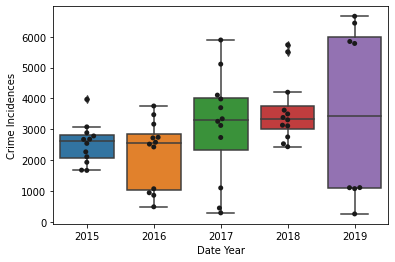

In [64]:
ax = sns.boxplot(x="Date Year", y="Crime Incidences", data=df_camden)
ax = sns.swarmplot(x="Date Year", y="Crime Incidences", data=df_camden, color=".10")

In [65]:
df_wards = df_crime.groupby(by=["Date Year", "Date Month", "Ward Name"]).agg(func={"Crime Incidences": 'sum'}).reset_index()

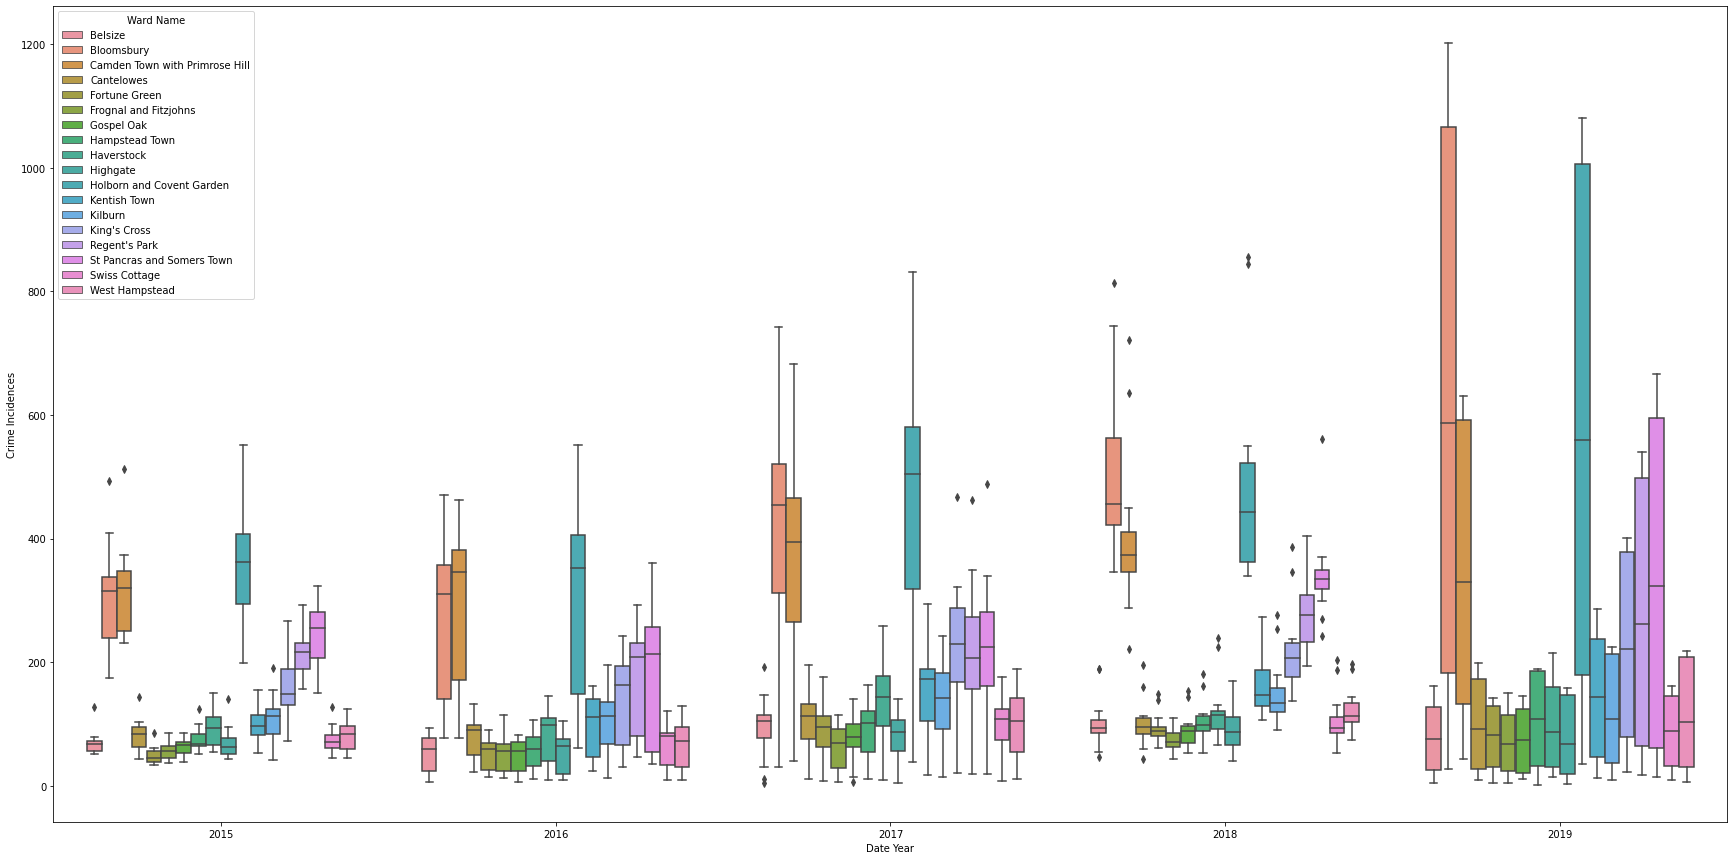

In [71]:
fig, ax = plt.subplots(figsize=(30, 15)) 
ax = sns.boxplot(ax=ax, x="Date Year", y="Crime Incidences", data=df_wards, hue="Ward Name", dodge=True)
#ax = sns.swarmplot(x="Date Year", y="Crime Incidences", data=df_wards, color=".10")

## Crime - Camden
Rate of change via logarithmic scale on crime incidences.

See that crime rate as a proportion of crime incidences to the population has increased over time.

[[*Stack Exchange - M. Lew, 2012*](https://stats.stackexchange.com/a/27977/276516)]

In [13]:
# population looks strange, shouldn't change month-by-month
df_crime.groupby(by=['Outcome Date']).agg(func={"Crime Incidences": 'sum', "Population": 'sum'}).reset_index().head(n=10)

,Outcome Date,Crime Incidences,Population
0,2015-01-01,1674,2614486.29
1,2015-02-01,2108,2817782.22
2,2015-03-01,2542,2864085.15
3,2015-04-01,2678,2950149.10
4,2015-05-01,3077,3005174.87
5,2015-06-01,3969,3029661.54
6,2015-07-01,1665,2768248.94
7,2015-08-01,1929,2747682.26
8,2015-09-01,2267,2872571.39
9,2015-10-01,2671,3020997.94


In [9]:
df_camden = df_crime.groupby(by=['Outcome Date']).agg(func={"Crime Incidences": 'sum', "Population": 'sum'}).reset_index()
df_camden['Crime Rate'] = df_camden['Crime Incidences'] / df_camden['Population']
df_camden['Crime Incidences Log'] = np.log10(df_camden['Crime Incidences'])

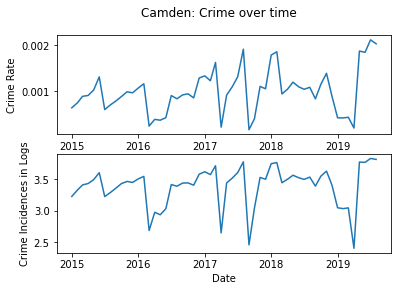

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("Camden: Crime over time")
ax1.plot("Outcome Date", "Crime Rate", data=df_camden)
ax1.set_xlabel("Date")
ax1.set_ylabel("Crime Rate")
ax2.plot("Outcome Date", "Crime Incidences Log", data=df_camden)
ax2.set_xlabel("Date")
ax2.set_ylabel("Crime Incidences in Logs")
plt.show()

## Crime - Camden wards
See that crime rates for all Camden wards have increased over time.

[[*StackOverflow - gboffi, 2018*](https://stackoverflow.com/a/53681489/13416265)]

In [34]:
df_wards = df_crime.groupby(by=['Outcome Date', 'Ward Name', 'Population']).agg(func={'Crime Incidences': 'sum'}).reset_index()
df_wards['Crime Rate'] = df_wards['Crime Incidences'] / df_wards['Population']

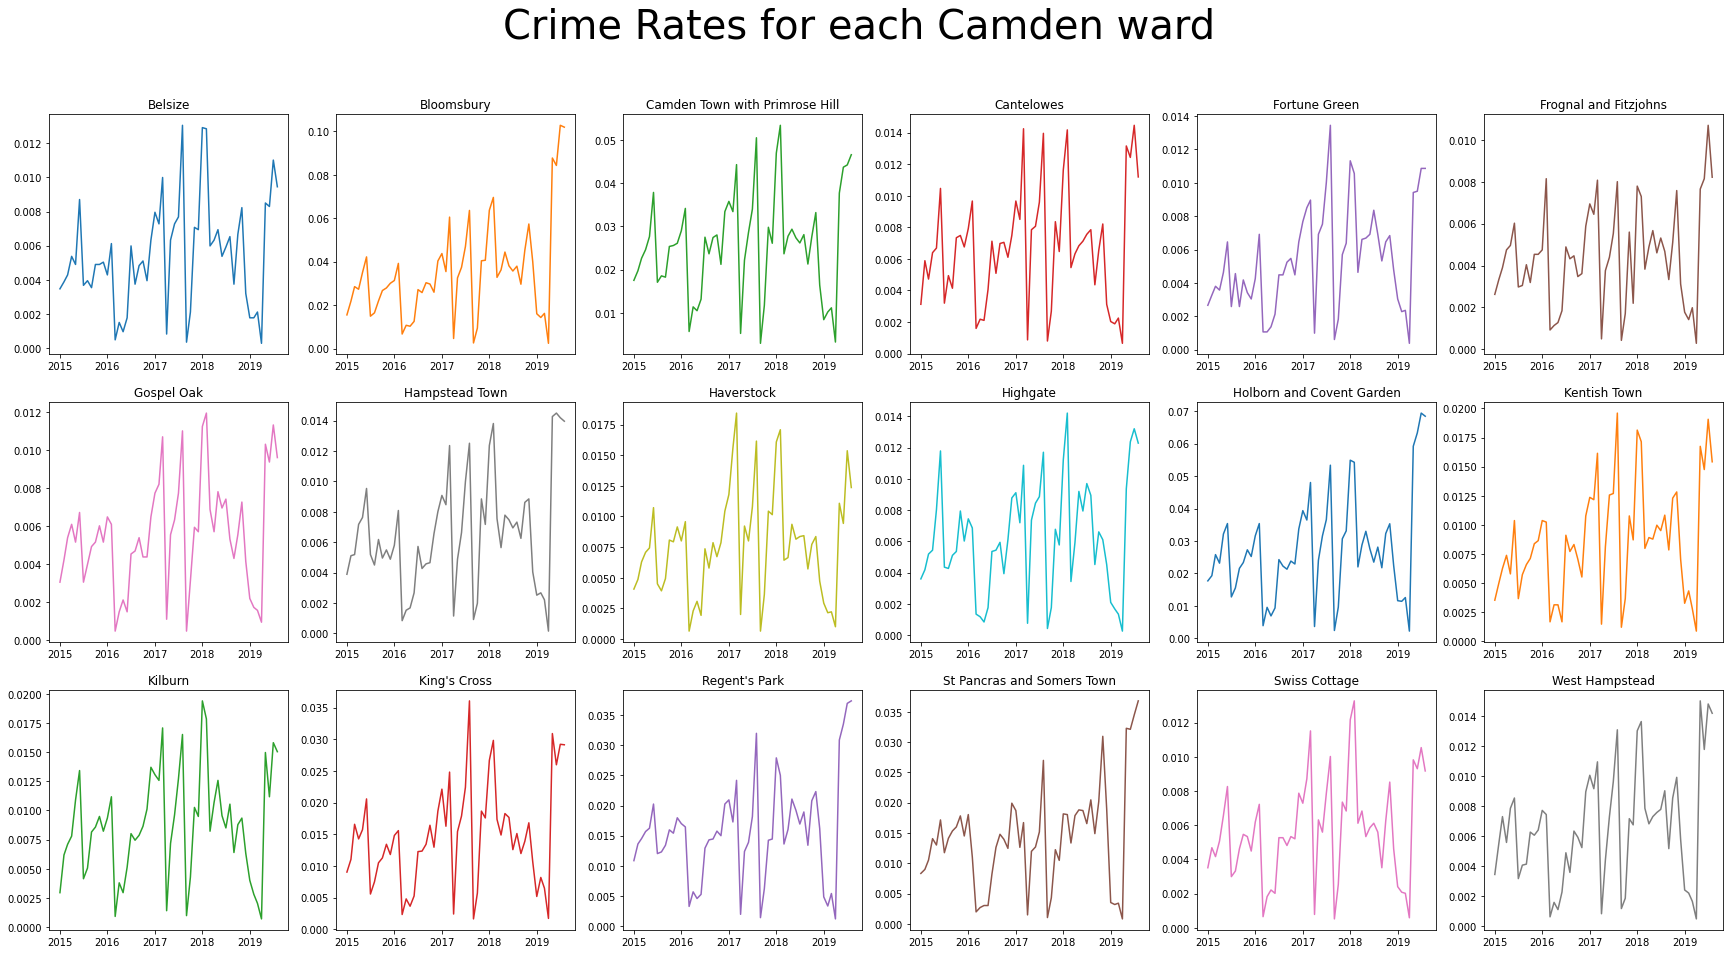

In [59]:
wards = df_wards["Ward Name"].unique()
colours = plt.rcParams['axes.prop_cycle']()

fig, axes = plt.subplots(3, 6, figsize=(30,15))
plt.suptitle(t="Crime Rates for each Camden ward", fontsize=40)
for ax, ward in zip(axes.flatten(), wards):
    df = df_wards[df_wards["Ward Name"] == ward]
    ax.plot("Outcome Date", "Crime Rate", data=df, **next(colours))
    ax.set_title(label=f"{ward}")